<a href="https://colab.research.google.com/github/himanshutyagi2020/Tensorflow/blob/main/MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import tensorflow as tf
from tensorflow import keras

In [168]:
tf.__version__

'2.6.0'

In [169]:
keras.__version__

'2.6.0'

In [170]:
fashion_mnist = keras.datasets.fashion_mnist

In [171]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [172]:
(X_train_full, y_train_full),(X_test,y_test)=fashion_mnist.load_data()

In [173]:
X_train_full.shape

(60000, 28, 28)

In [174]:
y_train_full.shape

(60000,)

In [175]:
X_test.shape

(10000, 28, 28)

In [176]:
y_test.shape

(10000,)

In [177]:
X_train_full.dtype

dtype('uint8')

In [178]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [179]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [180]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [181]:
class_names[y_train[0]]

'Coat'

In [182]:
model = keras.models.Sequential()

In [183]:
model.add(keras.layers.Flatten(input_shape=[28,28]))

In [184]:
model.add(keras.layers.Dense(300, activation="relu"))

In [185]:
model.add(keras.layers.Dense(100, activation="relu"))

In [186]:
model.add(keras.layers.Dense(10,activation="softmax"))

In [187]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [188]:
model.layers

In [189]:
hidden1 = model.layers[1]

In [190]:
hidden1.name

'dense_18'

In [191]:
model.get_layer('dense_18') is hidden1

True

In [192]:
weights, biases = hidden1.get_weights()

In [193]:
weights

array([[-0.0262922 ,  0.05069049,  0.00292542, ..., -0.05511625,
         0.05432144, -0.05929729],
       [-0.0177721 ,  0.00093624,  0.0075683 , ..., -0.02974008,
        -0.02124222, -0.04300298],
       [ 0.01416822,  0.02278346, -0.060241  , ...,  0.05854885,
         0.06779982,  0.0548435 ],
       ...,
       [-0.01045009, -0.00221995, -0.00117806, ...,  0.00099607,
         0.06602712,  0.05138049],
       [ 0.04279292, -0.05949519, -0.05120173, ..., -0.0067227 ,
        -0.03703114,  0.01617396],
       [-0.00937267, -0.07411414,  0.00613176, ...,  0.06165402,
         0.01332721, -0.01264441]], dtype=float32)

In [194]:
weights.shape

(784, 300)

In [195]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [196]:
biases.shape

(300,)

In [197]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

In [198]:
#from tensorflow.keras.layers import Dense

In [199]:
#output_layer = Dense(10)

In [200]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_train,y_train))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7184 - accuracy: 0.7646 - val_loss: 0.5101 - val_accuracy: 0.8258
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4848 - accuracy: 0.8318 - val_loss: 0.4442 - val_accuracy: 0.8456
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4386 - accuracy: 0.8478 - val_loss: 0.4251 - val_accuracy: 0.8521
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4135 - accuracy: 0.8560 - val_loss: 0.3921 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3930 - accuracy: 0.8623 - val_loss: 0.3815 - val_accuracy: 0.8651
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3770 - accuracy: 0.8682 - val_loss: 0.3756 - val_accuracy: 0.8647
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3631 - accuracy: 0.8717 - val_loss: 0.3736 - val_accuracy:

In [201]:
import pandas as pd


In [202]:
import matplotlib.pylab as plt

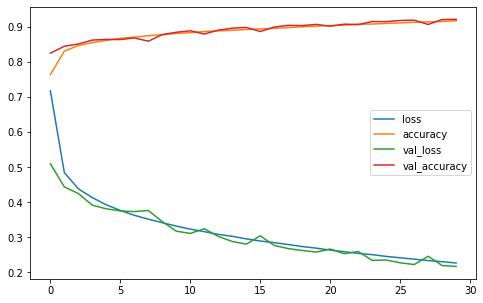

In [204]:
pd.DataFrame(history.history).plot(figsize=(8,5))